In [31]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time 
import pandas as pd

In [33]:
# set ChromeOptions and number of page
options = webdriver.ChromeOptions()
prefs = {
    'profile.default_content_setting_values' :
        {
        'notifications' : 2
         }
}
options.add_experimental_option('prefs',prefs)
options.add_experimental_option("useAutomationExtension", False)
options.add_experimental_option('excludeSwitches', ['enable-automation'])

chromedriver = 'chromedriver.exe'
pages = 200

options.set_capability("UNEXPECTED_ALERT_BEHAVIOUR", "ACCEPT")
options.set_capability("unexpectedAlertBehaviour", "accept")
options.set_capability("CapabilityType.UNEXPECTED_ALERT_BEHAVIOUR", "ACCEPT")
options.set_capability("UnexpectedAlertBehaviour", "ACCEPT")

In [34]:
# get 591 data 
price = []
area = []
kind = []
space = []
floor = []
top_floor = []
mrt = []
bd = []
pet = []
elevator = []
parking = []
balcony = []

chromedriver = 'chromedriver.exe' 
driver = webdriver.Chrome(chromedriver, chrome_options = options)
actions = ActionChains(driver)
driver.get('https://rent.591.com.tw/?region=8')
driver.implicitly_wait(20)
# driver.set_page_load_timeout(20)
# driver.set_script_timeout(20)
driver.maximize_window()
time.sleep(5)

driver.find_element(By.CLASS_NAME, "statement-confirm").click()

for page in range(0, pages):
    
    time.sleep(1)
    
    for _ in range(0, 13):
        time.sleep(1)
        actions.send_keys(Keys.SPACE).perform() 
        
    time.sleep(3)
    items = driver.find_elements(By.CLASS_NAME, "rent-item-right")
    # print(driver.current_url)
    for _ in items:

        item = _.text.split("\n")
        # print(item)
        if len(item) == 7:
            price.append(item[6])
        elif len(item) == 6:
            price.append(item[5])
        else :
            price.append("急租")
            
    
        area_info = item[3].split(" ")
        area.append(area_info[len(area_info)-1].split("-")[0])
        
        # if len(area_info)==1:
        #     area.append(area_info[0].split("-")[0])
        # else :
        #     area.append(area_info[1].split("-")[0])

        if "近捷運" in item[1]:
            mrt.append(1)
        else :
            mrt.append(0)

        if "近商圈" in item[1]:
            bd.append(1)
        else :
            bd.append(0)

        if "可養寵物" in item[1]:
            pet.append(1)
        else :
            pet.append(0)

        if "有電梯" in item[1]:
            elevator.append(1)
        else :
            elevator.append(0)

        if "有車位" in item[1]:
            parking.append(1)
        else :
            parking.append(0)

        if "有陽台" in item[1]:
            balcony.append(1)
        else :
            balcony.append(0)

        if "F" in item[2]:
            
            style_info = item[2].split(" ")
            kind.append(style_info[0])
            if len(style_info) == 4:
                f = style_info[3].split("/")
                floor.append(f[0])
                top_floor.append(f[1])
                space.append(style_info[2])

            elif len(style_info) == 3:
                f = style_info[2].split("/")
                floor.append(f[0])
                top_floor.append(f[1])
                space.append(style_info[1])
                
            else : 
                del price[-1]
                del area[-1]
                del mrt[-1]
                del bd[-1]
                del pet[-1]
                del elevator[-1]
                del parking[-1]
                del balcony[-1]
                
        else :
            del price[-1]
            del area[-1]
            del mrt[-1]
            del bd[-1]
            del pet[-1]
            del elevator[-1]
            del parking[-1]
            del balcony[-1]

        
    time.sleep(1)
    driver.find_element(By.CLASS_NAME, "pageNext").click()
    
    



/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_44892/3122032660.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver, chrome_options = options)
/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_44892/3122032660.py:16: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options = options)


In [48]:
# save data with csv and create a dataframe
data = {"kind":kind
        ,"area":area
        ,"space":space
        ,"floor":floor
        ,"top_floor":top_floor
        ,"mrt":mrt 
        ,"bd":bd
        ,"pet":pet
        ,"elevator":elevator
        ,"parking":parking
        ,"balcony":balcony
        ,"price":price
       }
df = pd.DataFrame(data = data)
df.tail(30)

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
5936,獨立套房,神岡區,7坪,2F,3F,0,0,0,0,0,0,"10,000元/月"
5937,整層住家,西屯區,12坪,10F,14F,1,1,1,0,0,0,"16,600元/月"
5938,整層住家,大雅區,15坪,4F,5F,0,0,1,0,0,0,"10,000元/月"
5939,獨立套房,潭子區,5坪,2F,5F,0,0,1,1,0,0,"7,500元/月"
5940,獨立套房,北區,7坪,6F,6F,0,1,0,0,0,0,"3,300元/月"
5941,獨立套房,神岡區,7坪,2F,4F,0,0,1,0,0,0,"10,000元/月"
5942,整層住家,西屯區,45坪,18F,29F,0,1,1,1,0,0,"28,000元/月"
5943,獨立套房,豐原區,7坪,2F,5F,0,0,0,0,0,0,"8,500元/月"
5944,分租套房,北區,10坪,1F,4F,0,1,0,0,0,0,"10,500元/月"
5945,獨立套房,豐原區,6坪,3F,5F,0,0,0,0,0,0,"7,800元/月"


In [49]:
# df.to_csv("tc_Rent_591.csv", index=False)

In [96]:
df = pd.read_csv("tc_Rent_591.csv")
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28坪,2F,15F,0,1,0,1,0,0,"29,000元/月"
1,獨立套房,北屯區,12.6坪,6F,7F,0,1,0,1,0,0,"8,699元/月"
2,獨立套房,北屯區,13坪,6F,7F,0,1,0,1,0,0,"11,000元/月"
3,獨立套房,北屯區,13坪,2F,7F,0,1,0,1,0,0,"11,000元/月"
4,獨立套房,北區,13坪,12F,12F,0,0,0,1,0,0,"11,000元/月"
...,...,...,...,...,...,...,...,...,...,...,...,...
5961,獨立套房,北區,8坪,2F,5F,0,0,1,0,0,0,"8,500元/月"
5962,整層住家,北屯區,49坪,14F,15F,0,0,0,1,1,0,"32,000元/月"
5963,獨立套房,西區,12坪,3F,5F,0,1,0,0,0,1,"12,000元/月"
5964,獨立套房,北區,10坪,7F,8F,0,1,0,1,0,0,"14,000元/月"


In [97]:
space_del_str = "坪"
df["space"] = df["space"].str.replace("坪","")
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28,2F,15F,0,1,0,1,0,0,"29,000元/月"
1,獨立套房,北屯區,12.6,6F,7F,0,1,0,1,0,0,"8,699元/月"
2,獨立套房,北屯區,13,6F,7F,0,1,0,1,0,0,"11,000元/月"
3,獨立套房,北屯區,13,2F,7F,0,1,0,1,0,0,"11,000元/月"
4,獨立套房,北區,13,12F,12F,0,0,0,1,0,0,"11,000元/月"
...,...,...,...,...,...,...,...,...,...,...,...,...
5961,獨立套房,北區,8,2F,5F,0,0,1,0,0,0,"8,500元/月"
5962,整層住家,北屯區,49,14F,15F,0,0,0,1,1,0,"32,000元/月"
5963,獨立套房,西區,12,3F,5F,0,1,0,0,0,1,"12,000元/月"
5964,獨立套房,北區,10,7F,8F,0,1,0,1,0,0,"14,000元/月"


In [98]:
floor_del_str = "F"
df["floor"] = df["floor"].str.replace("F","")

top_floor_del_str = "F"
df["top_floor"] = df["top_floor"].str.replace("F","")


price_del_str = "元/月"
df["price"] = df["price"].str.replace("元/月","")
price_del_str = ","
df["price"] = df["price"].str.replace(",","")


df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28,2,15,0,1,0,1,0,0,29000
1,獨立套房,北屯區,12.6,6,7,0,1,0,1,0,0,8699
2,獨立套房,北屯區,13,6,7,0,1,0,1,0,0,11000
3,獨立套房,北屯區,13,2,7,0,1,0,1,0,0,11000
4,獨立套房,北區,13,12,12,0,0,0,1,0,0,11000
...,...,...,...,...,...,...,...,...,...,...,...,...
5961,獨立套房,北區,8,2,5,0,0,1,0,0,0,8500
5962,整層住家,北屯區,49,14,15,0,0,0,1,1,0,32000
5963,獨立套房,西區,12,3,5,0,1,0,0,0,1,12000
5964,獨立套房,北區,10,7,8,0,1,0,1,0,0,14000


In [99]:
df["kind"] = df["kind"].astype("category")
df["area"] = df["area"].astype("category")
df["space"] = df["space"].astype("float64")
df["top_floor"] = df["top_floor"].astype("int64")

df.dtypes

kind         category
area         category
space         float64
floor          object
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price          object
dtype: object

In [100]:
df[df["price"]=="急租"]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
101,獨立套房,西區,11.2,4,5,0,1,0,0,0,0,急租
261,獨立套房,霧峰區,15.1,4,5,0,1,0,1,0,0,急租
811,獨立套房,北屯區,10.0,3,7,1,1,0,1,0,0,急租
959,整層住家,龍井區,20.0,9,9,0,1,0,1,0,0,急租
1153,整層住家,大肚區,70.0,整棟,3,0,0,1,0,1,0,急租
2136,獨立套房,西區,8.0,2,4,0,0,0,0,0,0,急租
3462,獨立套房,西屯區,6.0,3,5,0,1,0,0,1,0,急租
3618,獨立套房,西屯區,8.0,3,6,0,1,0,0,1,0,急租
3629,獨立套房,北屯區,10.5,2,6,0,1,1,1,0,0,急租
4188,整層住家,北屯區,22.4,24,24,1,1,0,1,0,0,急租


In [101]:
# 刪除急租資料，由於其在網站上降價幅度特別大，因此視為離群值，將其刪除
filter_price = df["price"]=="急租"
df = df[~filter_price]
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28.0,2,15,0,1,0,1,0,0,29000
1,獨立套房,北屯區,12.6,6,7,0,1,0,1,0,0,8699
2,獨立套房,北屯區,13.0,6,7,0,1,0,1,0,0,11000
3,獨立套房,北屯區,13.0,2,7,0,1,0,1,0,0,11000
4,獨立套房,北區,13.0,12,12,0,0,0,1,0,0,11000
...,...,...,...,...,...,...,...,...,...,...,...,...
5961,獨立套房,北區,8.0,2,5,0,0,1,0,0,0,8500
5962,整層住家,北屯區,49.0,14,15,0,0,0,1,1,0,32000
5963,獨立套房,西區,12.0,3,5,0,1,0,0,0,1,12000
5964,獨立套房,北區,10.0,7,8,0,1,0,1,0,0,14000


In [102]:
df["price"] = df["price"].astype("int64")
df.dtypes

/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_44892/1195682911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].astype("int64")


kind         category
area         category
space         float64
floor          object
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price           int64
dtype: object

In [103]:
df["floor"].value_counts()

3       1311
2        945
4        680
5        646
6        375
7        263
1        252
8        190
9        172
11       169
整棟       156
12       137
10       135
14       106
13       102
15        61
18        35
17        29
頂樓加蓋      24
16        18
19        18
1~4       13
22        12
20        12
24        11
21        11
23         9
28         8
1~2        6
1~3        6
27         6
25         5
2~4        5
26         2
2~3        2
B1         2
2~15       1
9~22       1
2~6        1
9~10       1
2~20       1
B1~5       1
3~4        1
5~6        1
B1~4       1
3~12       1
9~19       1
33         1
32         1
Name: floor, dtype: int64

In [104]:
# 刪除floor 為“多層樓”或“地下室”或”頂樓加蓋“的資料
filter1 = df["floor"].str.contains("~")
filter2 = df["floor"].str.contains("整棟")
filter3 = df["floor"].str.contains("頂樓加蓋")
filter4 = df["floor"].str.contains("B")

df = df.loc[~(filter1 | filter2 | filter3 | filter4)]
df.reset_index(drop=True, inplace = True)

df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28.0,2,15,0,1,0,1,0,0,29000
1,獨立套房,北屯區,12.6,6,7,0,1,0,1,0,0,8699
2,獨立套房,北屯區,13.0,6,7,0,1,0,1,0,0,11000
3,獨立套房,北屯區,13.0,2,7,0,1,0,1,0,0,11000
4,獨立套房,北區,13.0,12,12,0,0,0,1,0,0,11000
...,...,...,...,...,...,...,...,...,...,...,...,...
5717,獨立套房,北區,8.0,2,5,0,0,1,0,0,0,8500
5718,整層住家,北屯區,49.0,14,15,0,0,0,1,1,0,32000
5719,獨立套房,西區,12.0,3,5,0,1,0,0,0,1,12000
5720,獨立套房,北區,10.0,7,8,0,1,0,1,0,0,14000


In [105]:
df["floor"] = df["floor"].astype("int64")
df.dtypes

/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_44892/85766373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["floor"] = df["floor"].astype("int64")


kind         category
area         category
space         float64
floor           int64
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price           int64
dtype: object

In [106]:
df.kind.value_counts()

獨立套房    3170
整層住家    2343
分租套房     163
其他        23
雅房        23
Name: kind, dtype: int64

In [107]:
# 刪除租屋類型為"其他"的樣本，因其涵蓋範圍太廣，包含看板出租、店面出租、短期租約等等內容
(df["kind"]=="其他").sum()

23

In [108]:
filter_kind = df["kind"]=="其他"
df = df[~filter_kind]
df.reset_index(drop=True, inplace = True)

In [114]:
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,北屯區,28.0,2,15,0,1,0,1,0,0,29000
1,獨立套房,北屯區,12.6,6,7,0,1,0,1,0,0,8699
2,獨立套房,北屯區,13.0,6,7,0,1,0,1,0,0,11000
3,獨立套房,北屯區,13.0,2,7,0,1,0,1,0,0,11000
4,獨立套房,北區,13.0,12,12,0,0,0,1,0,0,11000
...,...,...,...,...,...,...,...,...,...,...,...,...
5694,獨立套房,北區,8.0,2,5,0,0,1,0,0,0,8500
5695,整層住家,北屯區,49.0,14,15,0,0,0,1,1,0,32000
5696,獨立套房,西區,12.0,3,5,0,1,0,0,0,1,12000
5697,獨立套房,北區,10.0,7,8,0,1,0,1,0,0,14000


In [110]:
# df.to_csv("tc_cleaned_Rent_591.csv", index=False)

In [123]:
df.iloc[[4507],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
4507,整層住家,北屯區,23.5,8,13,0,0,1,1,0,0,19000


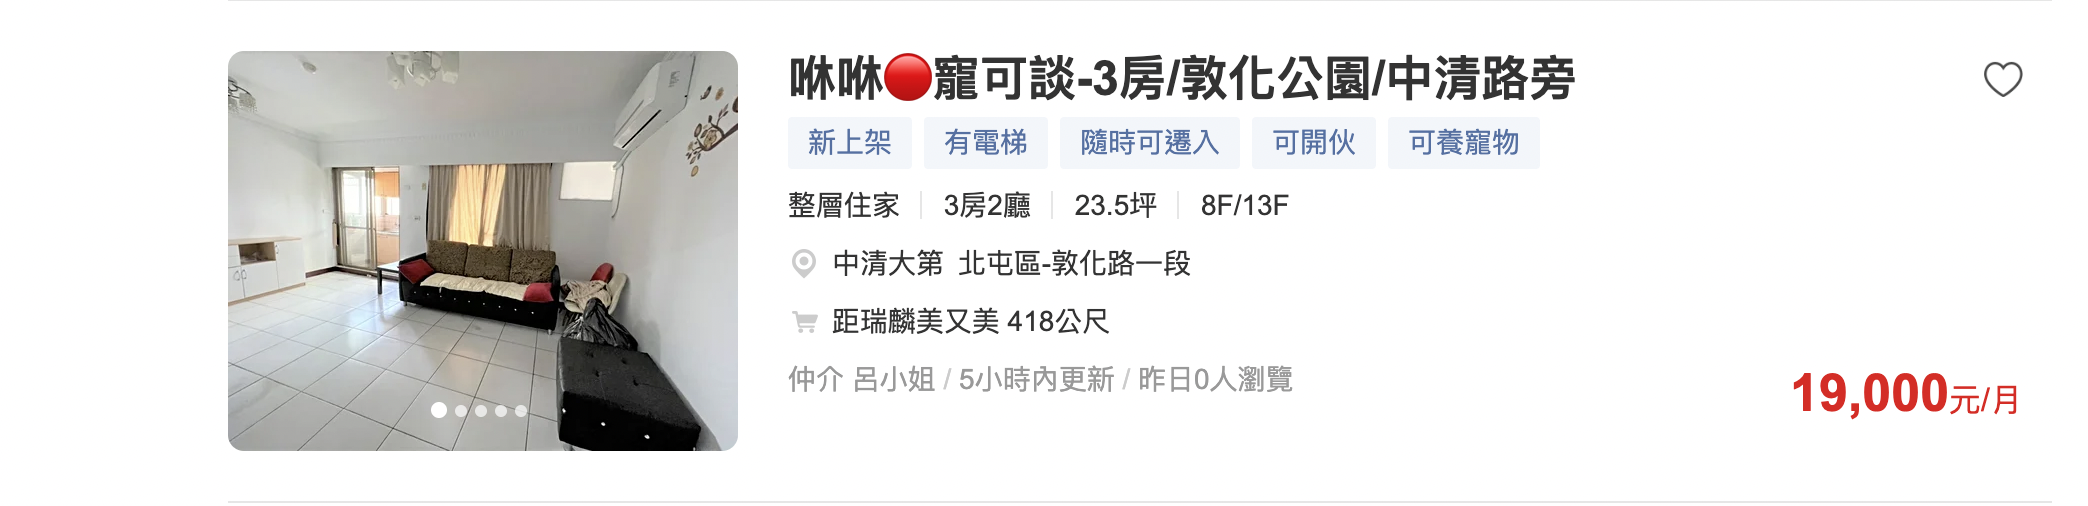

In [1]:
# 隨機抽取資料，驗證資料是否抓取有誤
from IPython.display import Image
Image(filename=('./tc_4507.png'),width=500)

In [124]:
df.iloc[[1490],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
1490,分租套房,北區,7.0,2,2,0,1,0,0,0,1,8000


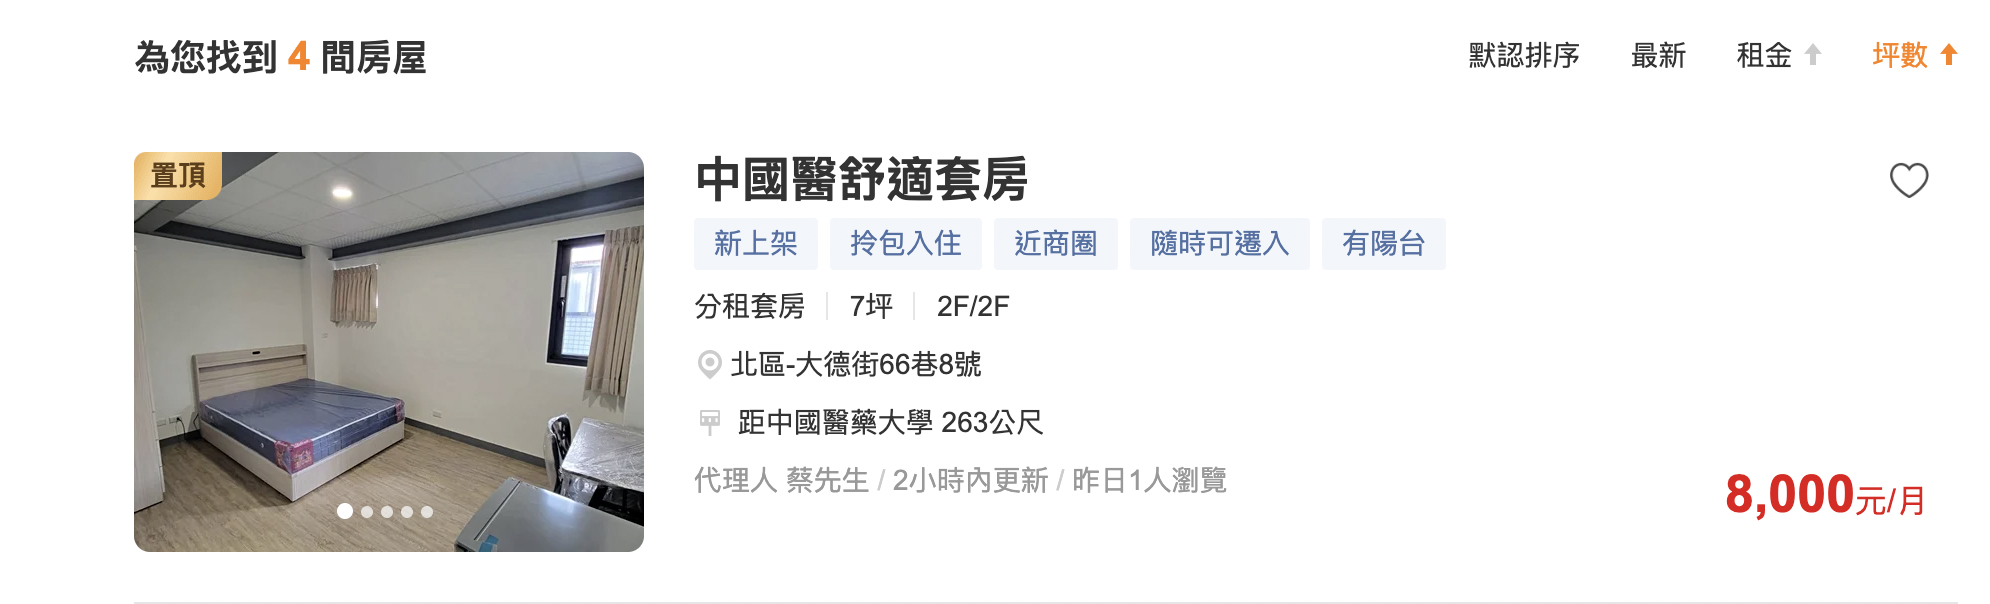

In [2]:
Image(filename=('./tc_1490.png'),width=500)

In [125]:
df.iloc[[3756],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
3756,整層住家,西屯區,14.0,2,23,0,0,0,1,1,0,24000


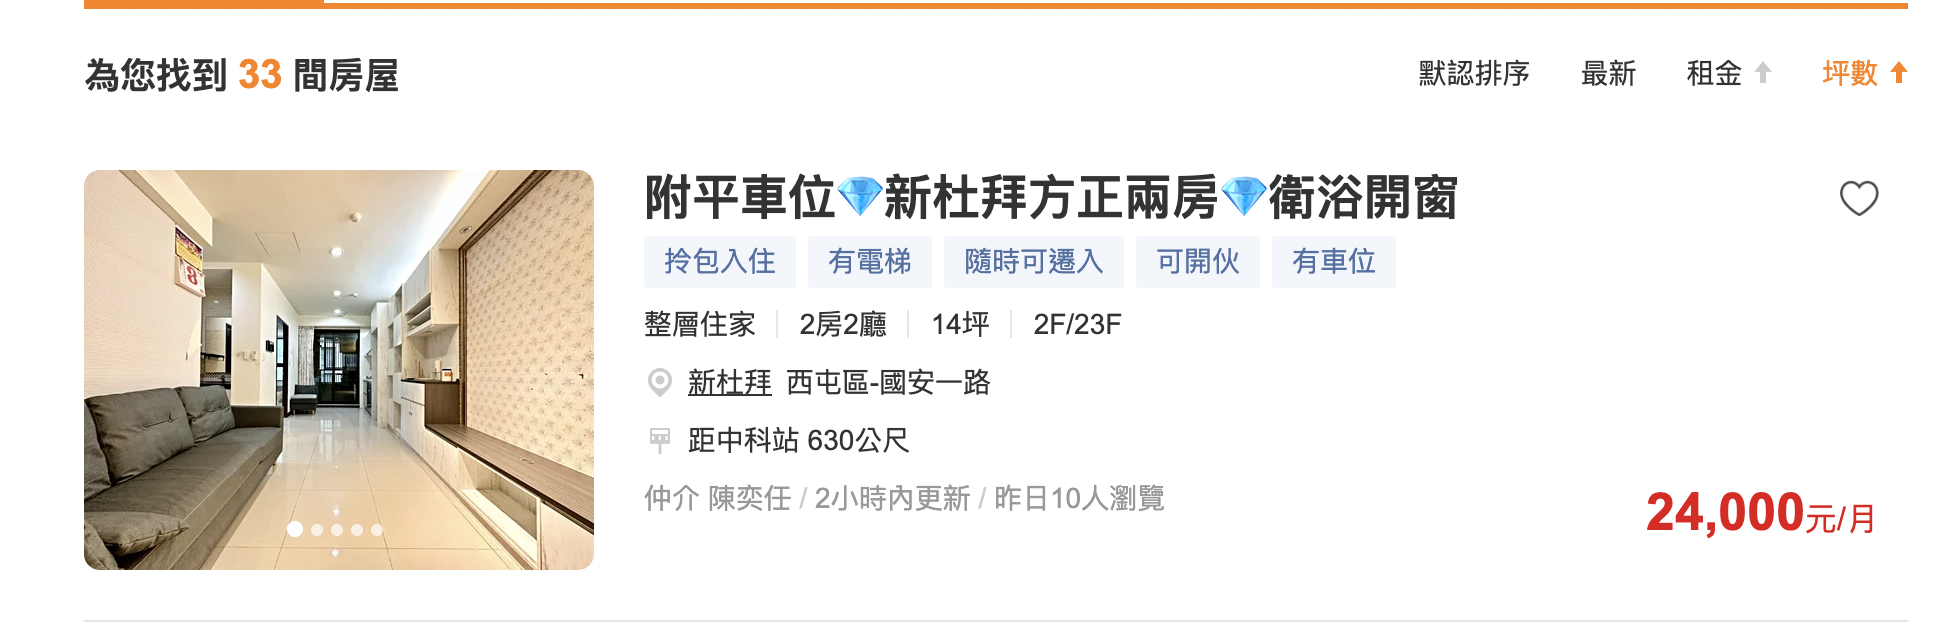

In [3]:
Image(filename=('./tc_3756.png'),width=500)

In [130]:
# 觀察重複被刊登的租屋
df[df.duplicated(subset=None, keep='first')]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
110,獨立套房,西屯區,10.0,3,5,1,1,0,1,0,0,7499
144,獨立套房,北區,10.0,3,5,0,1,0,1,0,1,6999
173,整層住家,北區,20.0,4,6,1,1,0,0,0,0,10499
227,獨立套房,西屯區,10.0,3,5,1,1,0,1,0,0,7999
266,獨立套房,北區,15.5,3,5,1,1,0,0,0,0,10499
...,...,...,...,...,...,...,...,...,...,...,...,...
5664,獨立套房,神岡區,7.0,2,4,0,0,1,0,0,0,8000
5669,獨立套房,神岡區,7.0,2,3,0,0,0,0,0,0,10000
5670,整層住家,西屯區,12.0,10,14,1,1,1,0,0,0,16600
5671,整層住家,大雅區,15.0,4,5,0,0,1,0,0,0,10000


In [142]:
# 刪除重複值
df = df.drop_duplicates()
df.reset_index(drop=True, inplace = True)

# df.to_csv("tc_cleaned_Rent_591.csv", index=False)

In [146]:
# a = df["area"]=="西屯區"
# b = df["price"]==9000
# df[a&b]